# Santander Value Prediction Challenge

Let's first import all the required libraries and read the data into a dataframe. So that we can observe the type of data and understand what the data is about.

In [11]:
#Import all the required libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [4]:
#Read the test file into a dataframe
test = pd.read_csv("C:/Users/Vedant/Santander Value Prediction Challenge/test.csv", engine='python')

In [6]:
test.shape

(49342, 4992)

In [7]:
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Read the csv file into a dataframe
train = pd.read_csv("C:/Users/Vedant/Santander Value Prediction Challenge/train.csv")
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


In [13]:
#Observe the data type of each column in the dataset
train.dtypes

ID            object
target       float64
48df886f9    float64
0deb4b6a8      int64
34b15f335    float64
a8cb14b00      int64
2f0771a37      int64
30347e683      int64
d08d1fbe3      int64
6ee66e115      int64
20aa07010    float64
dc5a8f1d8    float64
11d86fa6a    float64
77c9823f2      int64
8d6c2a0b2      int64
4681de4fd      int64
adf119b9a      int64
cff75dd09    float64
96f83a237      int64
b8a716ebf    float64
6c7a4567c      int64
4fcfd2b4d      int64
f3b9c0b95    float64
71cebf11c      int64
d966ac62c      int64
68b647452    float64
c88d108c9      int64
ff7b471cd      int64
d5308d8bc      int64
0d866c3d7    float64
              ...   
cdfc2b069    float64
2a879b4f7    float64
6b119d8ce    float64
98dea9e42      int64
9f2471031      int64
88458cb21      int64
f40da20f4      int64
7ad6b38bd    float64
c901e7df1      int64
8f55955dc      int64
85dcc913d    float64
5ca0b9b0c      int64
eab8abf7a      int64
8d8bffbae    float64
2a1f6c7f9      int64
9437d8b64      int64
5831f4c76    

# Exploratory Data Analysis

It is very important to understand the nature of the data. Understand the features and explore the data before applying predictive algorithms. Because exploratory data analysis gives a summary of the main characteristics and gives a detailed insight into the dataset.

In [5]:
#Data exploration
train.describe()

,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
count,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,...,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4459.000000,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03,4.459000e+03
mean,5.944923e+06,1.465493e+04,1.390895e+03,2.672245e+04,4.530164e+03,2.640996e+04,3.070811e+04,1.686522e+04,4.669208e+03,2.569407e+06,...,4.676057e+05,4.446239e+05,8.056219e+05,7.812966e+05,143.529939,1.213809e+05,3.573451e+04,3.123741e+05,9.219960e+04,2.279100e+05
std,8.234312e+06,3.893298e+05,6.428302e+04,5.699652e+05,2.359124e+05,1.514730e+06,5.770590e+05,7.512756e+05,1.879449e+05,9.610183e+06,...,4.068038e+06,4.428889e+06,4.513246e+06,6.839451e+06,9584.318507,4.720709e+06,1.614622e+06,4.318501e+06,1.635993e+06,1.811139e+06
min,3.000000e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.260000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,8.000000e+06,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+05,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,4.000000e+07,2.000000e+07,4.000000e+06,2.000000e+07,1.480000e+07,1.000000e+08,2.070800e+07,4.000000e+07,1.040000e+07,3.196120e+08,...,7.600000e+07,1.235880e+08,1.300000e+08,1.444000e+08,640000.000000,3.013120e+08,1.064200e+08,1.400000e+08,6.176800e+07,4.320000e+07


In [14]:
#Check unique values in 'target' column
train.target.unique()

array([38000000.,   600000., 10000000., ..., 20100000., 21320000.,
        1065000.])

In [15]:
#Sorting the target values to check the maximum and minimum value
train.target.sort_values(ascending=False)

713     40000000.00
1968    40000000.00
3662    40000000.00
730     40000000.00
3591    40000000.00
2619    40000000.00
1891    40000000.00
3467    40000000.00
985     40000000.00
4111    40000000.00
2354    40000000.00
173     40000000.00
348     40000000.00
2160    40000000.00
4220    40000000.00
2265    40000000.00
2266    40000000.00
2320    40000000.00
2336    40000000.00
3132    40000000.00
2341    40000000.00
3668    40000000.00
3783    40000000.00
2859    40000000.00
4001    40000000.00
2818    40000000.00
1341    40000000.00
1415    40000000.00
4305    40000000.00
1276    40000000.00
           ...     
649        32000.00
1972       32000.00
1237       32000.00
3498       31333.34
604        30000.00
2546       30000.00
1753       30000.00
4270       30000.00
3491       30000.00
3698       30000.00
1749       30000.00
4269       30000.00
1187       30000.00
2027       30000.00
3763       30000.00
1060       30000.00
3833       30000.00
997        30000.00
739        30000.00


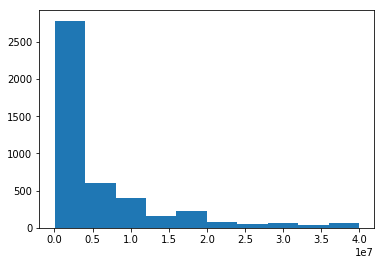

In [16]:
#Plot a histogram of the target column to examine its distribution
plt.hist(train['target'])
plt.show()

In [17]:
train.target.value_counts()

2000000.00     207
10000000.00    199
20000000.00    156
4000000.00     148
1000000.00     129
400000.00      115
200000.00      113
5000000.00     101
6000000.00      88
600000.00       84
8000000.00      65
3000000.00      61
800000.00       59
100000.00       44
40000000.00     40
40000.00        40
30000000.00     39
500000.00       39
1200000.00      39
300000.00       37
1600000.00      33
1400000.00      31
7000000.00      31
1500000.00      30
700000.00       28
1800000.00      28
30000.00        26
50000.00        25
60000.00        24
14000000.00     21
              ... 
38430000.00      1
3362000.00       1
3034400.00       1
1266666.66       1
3225333.34       1
19629142.86      1
744000.00        1
9026666.66       1
1451428.58       1
1658333.34       1
2576000.00       1
448666.66        1
7510000.00       1
113333.34        1
9180000.00       1
8596000.00       1
2575000.00       1
245000.00        1
19552000.00      1
2870000.00       1
103000.00        1
7182000.00  

# Plot the statistics of the features

In [10]:
#Assign the statistics of the dataset to a new dataframe to make all the statistics easily accessible
train_stat = train.describe().transpose()

In [11]:
train_stat.head()

,count,mean,std,min,25%,50%,75%,max
target,4459.0,5.944923e+06,8.234312e+06,30000.0,600000.0,2260000.0,8000000.0,40000000.0
48df886f9,4459.0,1.465493e+04,3.893298e+05,0.0,0.0,0.0,0.0,20000000.0
0deb4b6a8,4459.0,1.390895e+03,6.428302e+04,0.0,0.0,0.0,0.0,4000000.0
34b15f335,4459.0,2.672245e+04,5.699652e+05,0.0,0.0,0.0,0.0,20000000.0
a8cb14b00,4459.0,4.530164e+03,2.359124e+05,0.0,0.0,0.0,0.0,14800000.0


In [12]:
#Sort the mean values of each feature to see how the means of all the features stack up against each other
train_stat.sort_values('mean', ascending=False)

,count,mean,std,min,25%,50%,75%,max
target,4459.0,5.944923e+06,8.234312e+06,30000.0,600000.0,2260000.0,8000000.00,40000000.0
580f5ff06,4459.0,3.073396e+06,2.333833e+07,0.0,0.0,0.0,0.00,860660000.0
bf042d928,4459.0,3.017854e+06,2.221017e+07,0.0,0.0,0.0,0.00,860660000.0
692c44993,4459.0,2.999576e+06,2.323085e+07,0.0,0.0,0.0,0.00,860660000.0
d4cc42c3d,4459.0,2.936500e+06,2.252009e+07,0.0,0.0,0.0,0.00,860660000.0
1351bf96e,4459.0,2.921197e+06,2.239815e+07,0.0,0.0,0.0,0.00,860660000.0
39b3c553a,4459.0,2.901250e+06,2.154811e+07,0.0,0.0,0.0,0.00,860660000.0
1eec37deb,4459.0,2.832937e+06,2.229671e+07,0.0,0.0,0.0,0.00,860660000.0
453128993,4459.0,2.796730e+06,2.354608e+07,0.0,0.0,0.0,0.00,860660000.0
6488c8200,4459.0,2.775966e+06,2.374778e+07,0.0,0.0,0.0,0.00,860660000.0


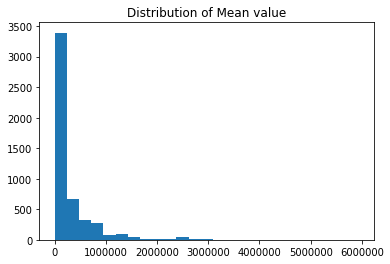

In [13]:
plt.hist(train_stat['mean'], bins = 25)
plt.title('Distribution of Mean value')
plt.show()

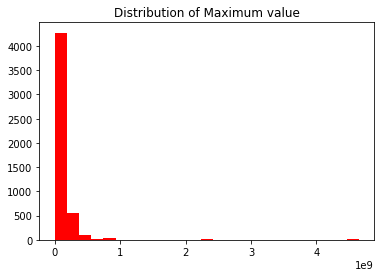

In [14]:
plt.hist(train_stat['max'], color='r', bins = 25)
plt.title('Distribution of Maximum value')
plt.show()

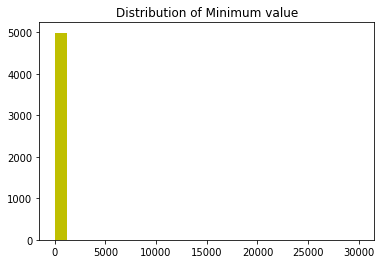

In [15]:
plt.hist(train_stat['min'], color='y', bins = 25)
plt.title('Distribution of Minimum value')
plt.show()

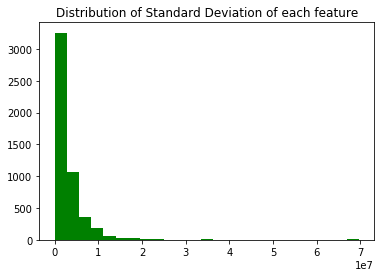

In [16]:
plt.hist(train_stat['std'], color='g', bins = 25)
plt.title('Distribution of Standard Deviation of each feature')
plt.show()

# Plot the data

We can't plot all the data because it has 4992 features. So we will plot a select few features

In [18]:
#Create a list of all the features
features = train.columns.tolist()[2:]

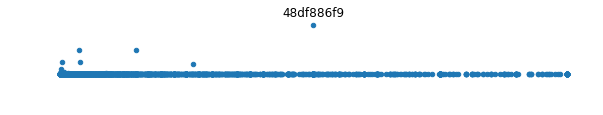

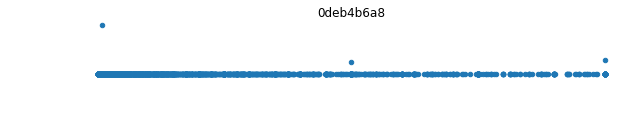

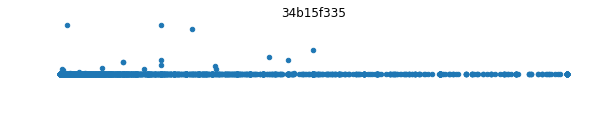

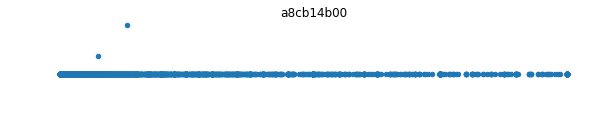

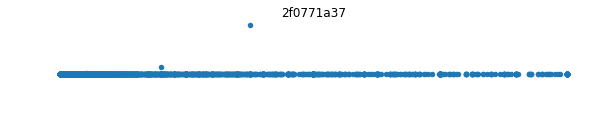

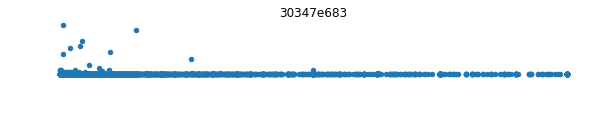

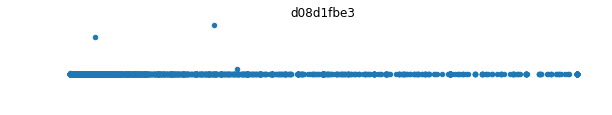

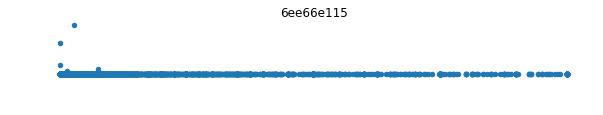

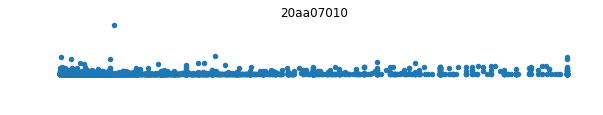

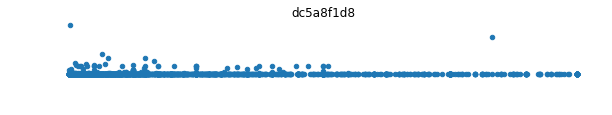

In [19]:
#Let's plot first 10 features
for each in features[:10]:
    train.plot(x='target', y=each, figsize=(10, 1), kind='scatter', title=each)
    plt.axis('off')

## Split the training data 70-30% for training and validation

In [31]:
# split to training and testing datasets
from sklearn.model_selection import train_test_split
train_x,  test_x, train_y, test_y = train_test_split(train.iloc[:, 2:], train['target'], test_size=0.3)

## Applying PCA on training and testing data to reduce the data dimension

#### Let's try to reduce the number of features and extract the important features by applying PCA. It will reduce a lot of the complications and give us a much clearer idea of the data

In [32]:
#Select random number of components to see how much they explain the variance
pca = PCA(n_components = 100)
pca.fit(train_x.as_matrix())

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
sum(pca.explained_variance_ratio_)

0.7299072242122184

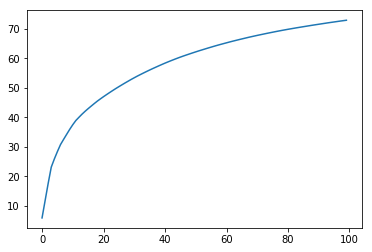

In [34]:
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.show()

In [35]:
#Try 200 components
pca = PCA(n_components = 200)
pca.fit(train_x.as_matrix())

PCA(copy=True, iterated_power='auto', n_components=200, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [36]:
#Total variance explained by 200 components
sum(pca.explained_variance_ratio_)

0.831156579476422

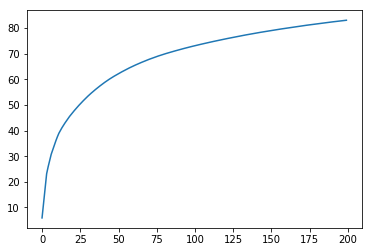

In [37]:
#Plot of the variance explained
plt.plot(np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100))
plt.show()

#### Seeing the above plots, we should go with the 200 principal components. It explains about 83% of the variance. So further analysis will be done on these 200 components.

In [38]:
#train_mod file is the training data after dimension reduction using PCA
train_x = pca.fit_transform(train_x)
test_x = pca.transform(test_x)

In [39]:
train_x = pd.DataFrame(train_x)

In [40]:
train_x.head()

,0,1,2,3,4,5,6,7,8,9,...,190,191,192,193,194,195,196,197,198,199
0,-1.017159e+06,-1.164985e+06,-1.289379e+06,-1.906271e+07,-5.083647e+06,-3.579740e+06,-1.440537e+07,126834.608507,-156940.981388,-398475.381879,...,-6.277060e+06,2.747398e+05,-5.066049e+06,-3.477226e+06,8.075030e+06,3.731761e+06,3.832098e+06,1.378730e+06,3.218648e+06,1.648145e+06
1,-7.422617e+05,-9.523944e+05,-6.158029e+05,-2.986971e+07,-7.269015e+06,-4.091750e+06,-1.175144e+07,466436.937514,-447920.714268,186712.873299,...,-1.782412e+05,-1.146216e+05,-1.384709e+05,3.116037e+05,3.195104e+05,-7.042136e+05,8.900834e+04,-4.366611e+04,4.786443e+04,-7.850750e+05
2,-8.461564e+05,-1.038064e+06,-8.899436e+05,-2.563299e+07,-3.327183e+06,-2.773470e+06,-1.057925e+07,146138.111017,-589156.163834,-855700.385753,...,-2.317047e+06,3.571120e+06,-3.081199e+06,-1.524784e+06,-4.048807e+06,3.259190e+06,-3.390017e+06,1.190169e+06,1.363882e+06,1.696271e+06
3,-7.139332e+05,-9.312434e+05,-5.487455e+05,-3.086399e+07,-8.209437e+06,-4.138677e+06,-1.134454e+07,557261.850206,-553943.391007,240532.847341,...,-5.197007e+05,-4.126761e+05,-9.161665e+02,6.852900e+03,6.499666e+05,-3.089165e+05,-1.857335e+05,-3.419121e+05,-6.543233e+04,-9.682573e+05
4,-7.760394e+05,-9.880407e+05,-7.243230e+05,-2.875021e+07,-3.293580e+06,-2.847569e+06,-6.982659e+06,753389.388428,-702919.972297,232354.585694,...,-2.315454e+06,1.760923e+06,-7.748199e+05,1.180888e+06,-1.086169e+06,-1.264102e+05,1.508451e+06,1.797310e+06,2.895537e+05,1.428814e+06


#### Since we have reduced the dimension of our data, we can start applying algorithms to predict the target values

### Model fitting using Gradient boosting

In [41]:
#fit a model using Gradient Boosting regressor
from sklearn.ensemble import GradientBoostingRegressor as gbr
gb_model = gbr()
gb_model.fit(train_x, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [42]:
#Predicting the target values for validation data
gb_pred = gb_model.predict(test_x)

In [43]:
#Calculating mean absolute error between the predicted and the actual values
from sklearn.metrics import mean_absolute_error as MAE
print("mean_absolute_error : " + str(MAE(gb_pred, test_y)))

mean_absolute_error : 4926756.273572611


### Model fitting using Random Forest

In [44]:
#Fit a model using Random Forest
from sklearn.ensemble import RandomForestRegressor as rf
rf_model = rf()
rf_model.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [45]:
#Predicting the target values for validation data
rf_pred = rf_model.predict(test_x)

In [46]:
##Calculating mean absolute error between the predicted and the actual values
print("mean_absolute_error : " + str(MAE(rf_pred, test_y)))

mean_absolute_error : 5408902.681955157


### Model fitting using Support Vector Machine

In [47]:
#fit the model using svm
from sklearn.svm import SVR
svm_model = SVR()
svm_model.fit(train_x, train_y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [48]:
#Predicting the target values for validation data
svm_pred = svm_model.predict(test_x)

In [49]:
#Calculating the mean absolute error between the actual and predicted values
print("mean abolute error :" + str(MAE(svm_pred, test_y)))

mean abolute error :5146461.9097010465


### Implement Neural Network on the data for more accurate results

In [52]:
#Import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [53]:
from keras.models import Model
from keras.layers import Input, Dense, Dropout

In [57]:
# Initialising the ANN
regressor = Sequential()

# Adding the input layer and the first hidden layer
regressor.add(Dense(output_dim = 128,  activation = 'relu', input_dim = 4991))

# Adding the output layer
regressor.add(Dense(1))
inp = Input(shape=(200,))
hidden_1 = Dense(128, activation='relu')(inp)
dropout_1 = Dropout(0.2)(hidden_1)
hidden_2 = Dense(128, activation='relu')(dropout_1)
dropout_2 = Dropout(0.2)(hidden_2)
hidden_3 = Dense(128, activation='relu')(dropout_2)
dropout_3 = Dropout(0.2)(hidden_3)
hidden_4 = Dense(128, activation='relu')(dropout_3)
dropout_4 = Dropout(0.2)(hidden_4)
hidden_5 = Dense(128, activation='relu')(dropout_4)
dropout_5 = Dropout(0.2)(hidden_5)
out = Dense(1)(dropout_5)

regressor = Model(inputs=inp, outputs=out)

C:\Users\Vedant\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", input_dim=4991, units=128)`
  """


In [58]:
# Compiling the ANN
regressor.compile(optimizer = 'adam', loss = 'mse', metrics=['mae'])

In [59]:
# Fitting the ANN to the Training set
regressor.fit(train_x, train_y, epochs = 100, batch_size = 32, verbose=1, validation_split=0.1)

Train on 2808 samples, validate on 313 samples
Epoch 1/100
2808/2808 [==============================] - 2s 684us/step - loss: 116823591995537.8750 - mean_absolute_error: 6232993.9993 - val_loss: 61669381266330.5859 - val_mean_absolute_error: 4898636.5192
Epoch 2/100
2808/2808 [==============================] - 0s 167us/step - loss: 94092289710097.5000 - mean_absolute_error: 5790971.1816 - val_loss: 58233813137990.3359 - val_mean_absolute_error: 4827487.2668
Epoch 3/100
2808/2808 [==============================] - 0s 165us/step - loss: 92725503074327.3438 - mean_absolute_error: 5754526.6823 - val_loss: 59842832815689.6016 - val_mean_absolute_error: 4784955.2332
Epoch 4/100
2808/2808 [==============================] - 0s 164us/step - loss: 85518095528437.7812 - mean_absolute_error: 5872248.0940 - val_loss: 54061536724776.0859 - val_mean_absolute_error: 4705771.8610
Epoch 5/100
2808/2808 [==============================] - 0s 165us/step - loss: 75588256311978.6719 - mean_absolute_error: 54

2808/2808 [==============================] - 0s 165us/step - loss: 32001124581702.7461 - mean_absolute_error: 3720385.9993 - val_loss: 46918777756465.8984 - val_mean_absolute_error: 4274904.8291
Epoch 41/100
2808/2808 [==============================] - 0s 163us/step - loss: 31845633959218.3203 - mean_absolute_error: 3716312.9936 - val_loss: 47203875453615.0312 - val_mean_absolute_error: 4237187.6581
Epoch 42/100
2808/2808 [==============================] - 0s 164us/step - loss: 30215826352437.2422 - mean_absolute_error: 3646937.1603 - val_loss: 45171108659880.4844 - val_mean_absolute_error: 4263189.8882
Epoch 43/100
2808/2808 [==============================] - 0s 165us/step - loss: 28977854284896.2695 - mean_absolute_error: 3586046.5100 - val_loss: 46352446294375.8750 - val_mean_absolute_error: 4210866.6166
Epoch 44/100
2808/2808 [==============================] - 0s 163us/step - loss: 29563849037701.4688 - mean_absolute_error: 3568083.5463 - val_loss: 46763080260663.6172 - val_mean_ab

2808/2808 [==============================] - 0s 175us/step - loss: 25278612586729.3906 - mean_absolute_error: 3248210.8789 - val_loss: 46856044971973.1094 - val_mean_absolute_error: 4150053.2827
Epoch 80/100
2808/2808 [==============================] - 0s 167us/step - loss: 24595114209595.0781 - mean_absolute_error: 3181379.3978 - val_loss: 46267728951564.2656 - val_mean_absolute_error: 4152353.4169
Epoch 81/100
2808/2808 [==============================] - 0s 166us/step - loss: 25312143675216.9570 - mean_absolute_error: 3212304.6752 - val_loss: 46967454195424.1016 - val_mean_absolute_error: 4260799.8866
Epoch 82/100
2808/2808 [==============================] - 0s 170us/step - loss: 24067493236094.1797 - mean_absolute_error: 3136941.3946 - val_loss: 45185992542934.2891 - val_mean_absolute_error: 4220523.0144
Epoch 83/100
2808/2808 [==============================] - 0s 178us/step - loss: 22532864989341.5391 - mean_absolute_error: 3101293.8013 - val_loss: 45555113874494.1562 - val_mean_ab

In [60]:
#Predict the values for validation data using Neural Network model
nn_pred = regressor.predict(test_x)
print("mean_absolute_error : " + str(MAE(nn_pred, test_y)))

mean_absolute_error : 4699475.80816015
